## Weaknesses of Monoalphabetic Ciphers

As early as the 9th century, the great weakness of monoalphabetic
ciphers (Caesar cipher) was recognized in the Islamic world. The
distribution of letters follows a specific but constant pattern in every
language. As explained in the last section, the letter 'e' is by far the
most common letter in the English language.

To demonstrate that this applies to any given (longer) texts, the text
of the 
<a href="https://thekingsbible.com/Bible/66/1" target="_blank">
Book of Revelations from the King James Bible
</a>
was analyzed. The resulting distribution of letters was plotted against
the distribution from the table. The result is shown in the figure
below.


In [2]:
import string

def file_reader(path : str) -> str:

    with open(path, mode='r', encoding='utf-8') as f:
        text = f.read()

    return text

def text_cleaning(text : str) -> str:
    clean = text.upper() \
                .replace('Ä', 'AE') \
                .replace('Ö', 'OE') \
                .replace('Ü', 'UE') \
                .replace('ß', 'SS') \
                .replace(' ', '') \

    cleaned_text = ''

    for c in clean:
        if c.isalpha():
            cleaned_text += c
    
    return cleaned_text

def file_writer(path : str, text : str) -> None:
    i = 0
    grouped_text = ""
    for c in text:
        i += 1
        if i % 50 == 0:
            grouped_text += c + "\n"
        elif i % 5 == 0:
            grouped_text += c + " "
        else:
            grouped_text += c
        
    with open(path, mode='w', encoding='utf-8') as f:
        f.write(grouped_text)
        
revelation = file_reader('revelation.txt')
cleaned_revelation = text_cleaning(revelation)
file_writer('cleaned_revelation.txt', cleaned_revelation)

In [ ]:
def letter_frequency(text: str) -> dict:
    frequency = {}
    total_letters = 0
    
    for char in text:
        if char not in frequency:
            frequency[char] = 1
        else:
            frequency[char] += 1
        total_letters += 1
        
    for key, value in frequency.items():
        frequency[key] = (value / total_letters) * 100
        
           
    return frequency

frequency_revelation = letter_frequency(cleaned_revelation)

{'T': 9.887444810646103, 'H': 8.931865762908608, 'E': 13.10449184337624, 'R': 5.368654519826711, 'V': 1.1379889310366271, 'L': 3.532118649337728, 'A': 9.193043550359638, 'I': 5.69201749476608, 'O': 7.058018779926621, 'N': 7.5409904027527315, 'F': 2.5288642911925048, 'J': 0.11815185622784652, 'S': 5.683726136434301, 'U': 2.2386667495802497, 'C': 1.7411852496735276, 'W': 2.4065667557987687, 'G': 1.8178803142424809, 'D': 5.3728001989926, 'M': 2.1909914391725223, 'Y': 1.2893062205915884, 'P': 1.2312667122691376, 'B': 1.2126111560226354, 'K': 0.6342889123810708, 'Q': 0.043529631241838194, 'X': 0.03523827291005949, 'Z': 0.008291358331778704}


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
standard_frequency = {
    'E': 12.02,
    'T': 9.10,
    'A': 8.12,
    'O': 7.68,
    'I': 7.31,
    'N': 6.95,
    'S': 6.28,
    'R': 6.02,
    'H': 5.92,
    'D': 4.32,
    'L': 4.03,
    'C': 2.78,
    'U': 2.76,
    'M': 2.41,
    'W': 2.36,
    'F': 2.23,
    'G': 2.02,
    'Y': 1.97,
    'P': 1.93,
    'B': 1.49,
    'V': 0.98,
    'K': 0.77,
    'J': 0.15,
    'X': 0.15,
    'Q': 0.10,
    'Z': 0.07
}

df = pd.DataFrame.from_dict([standard_frequency, frequency_revelation])
df.index = ['Standard Frequency', 'Revelation Frequency']
dft = df.T
dft = dft.sort_index()
dft['Standard Frequency'] = dft['Standard Frequency'].astype(float)
dft['Revelation Frequency'] = dft['Revelation Frequency'].astype(float)

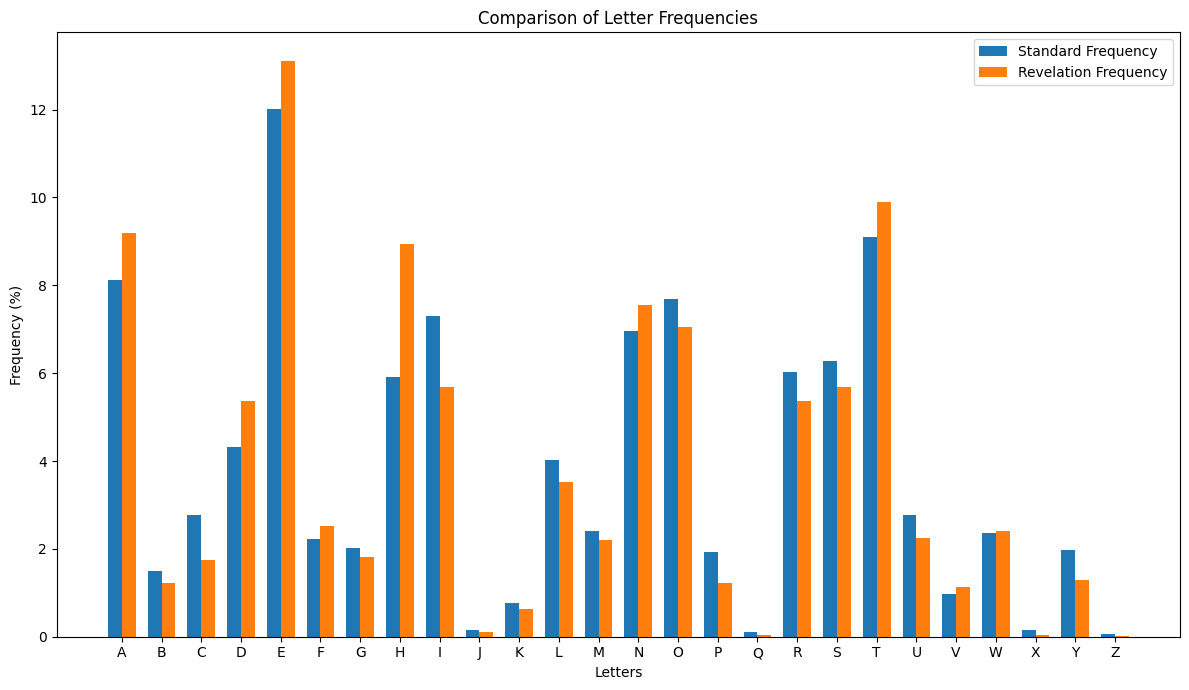

In [17]:
# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standard Frequency')
ax.bar(x + bar_width/2, dft['Revelation Frequency'], bar_width, label='Revelation Frequency')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Letters')
ax.set_ylabel('Frequency (%)')
ax.set_title('Comparison of Letter Frequencies')
ax.legend()
plt.tight_layout()
plt.show()


![](plain.svg)

Die Grafik zeigt, dass bei einer Textlänge von 13'343 Buchstaben die Verteilung
in einem literarischen Text nahezu identisch ist, mit der allgemeinen
Häufigkeitsverteilung in der deutschen Sprache.

Die nächste Grafik zeigt, was mit der Verteilung der Buchstaben geschieht, wenn
der gleiche Text mit einer Caesar-Chiffre verschlüsselt worden ist.

![](cipher.svg)

Es ist deutlich zu erkennen, dass die Verteilung dem gleichen Muster folgt -
verschoben um fünf Positionen. Diese Auswertung ermöglicht die Entschlüsselung
des Textes, ohne alle möglichen Schlüsselalphabete durchzuprobieren.

## Vigenère Chiffre

Bei der Vigenère Chiffre handelt es sich um eine polyalphabetische Chiffre. Das
Verfahren ist nach Blaise de Vigenère (1523 - 1596) benannt. polyalphabetisch
heisst, dass zur Verschlüsselung nicht eine Verschiebung vorgenommen wird
sondern - nach jedem Buchstaben wechselnd - mehrere Verschiebungen
vorgenommen werden.

Um das zu erreichen, verwendet man ein sogenanntes Vigenère-Quadrat wie unten
abgebildet. 

![](vigenere_square_shading.svg)

Für die Verschlüsselung eines Klartextes braucht das Vigenère Verfahren ein
Schlüsselwort. Das Schlüsselwort sollte möglichst lang sein. Das folgende
Beispiel soll zeigen, wie das Vigenère Verfahren funktioniert. Der zu
verschlüsselnde Klartext lautet 'Kryptologie ist spannend' und der
Schlüssel
'Buelrain'. Als Hilfestellung werden Text und Schlüssel in einer Tabelle
dargestellt.

```
kryptologieistspannend
buelrainbuelrainbuelra
```

Der Schlüssel wir dabei ohne Wortabstand so oft wiederholt, bis die
Buchstabenfolge des Schlüssels gleich lang ist, wie die Buchstabenfolge, welche
zu verschlüsseln ist.  
Als nächstes wird der zu verschlüsselnde Buchstabe in der Kopfzeile des Vigenère
Quadrates gesucht. Damit wird die Spalte mit dem verschobenen Alphabet
identifiziert. Der chiffrierte Buchstaben ergibt sich, indem in der Spalte mit
den Zeilenköpfen der unter dem zu chiffrierenden Buchstaben befindliche
Buchstabe des Schlüssels gesucht wird. Der Schnittpunkt der Zeile mit der vorher
gefundenen Spalte entspricht dem chiffrierten Buchstaben.

```
kryptologieistspannend
buelrainbuelrainbuelra

LLCAKOTBHCITJTACBHRPED
```

Alternativ kann eine Verschlüsselung mit der Vigenère Chiffre auch mit modularer
Arithmetik umgesetzt werde. Dazu wird jedem Buchstaben ein Zahlenwert nach dem
Muster $a = 0, b = 1, ... , z = 25$ zugewiesen. Die Verschlüsselung erfolgt
anschliessend nach der 'Formel' $C_i = (P_i + K_i) mod 26$ Wobei die Buchstaben
$C$ für den chiffrierten Text, $P$ für den Klartext (Englisch *plain text*) und
$K$ für den Schlüssel (Englisch *key*) stehen. Der Index $_i$ steht für den
$i$-ten Buchstaben in der Textfolge.

Das obige Beispiel stellt sich dann folgendermassen dar:

```
 k  r  y  p  t  o  l  o  g  i  e  i  s  t  s  p  a  n  n  e  n  d
10 17 24 15 19 14 11 14 06 08 04 08 18 19 18 15 00 13 13 04 13 03
 b  u  e  l  r  a  i  n  b  u  e  l  r  a  i  n  b  u  e  l  r  a
01 20 04 11 17 00 08 13 01 20 04 11 17 00 08 13 01 20 04 11 17 00

11 37 28 26 36 14 19 27 07 28 08 19 35 19 26 28 01 33 17 15 30 03

11 11 02 00 10 14 19 01 07 02 08 19 09 19 00 02 01 07 17 15 04 03
 L  L  C  A  K  O  T  B  H  C  I  T  J  T  A  C  B  H  R  P  E  D
```

Für die Entschlüsselung wird die 'Formel' folgendermassen umgekehrt: 
$P_i = (C_i - K_i + 26) mod 26$. Die Addition von 26 in der Klammer erfolgt, um
negative Zahlen zu vermeiden.

Wie sich die Vigenère Verschlüsselung auf die Verteilung der Buchstaben
auswirkt, kann untenstehender Grafik entnommen werden.

![](vigenere.svg)

Wie unschwer zu erkennen ist, stellt sich die Verteilung der Buchstaben in einem
polyalphabetisch verschlüsselten Text deutlich anders dar, als dies in normalen
Text der Fall ist. Die Vigenère Chiffre galt daher während ungefähr 300 Jahren
als 'la chiffre indéchiffrable'.

Ein Spezialfall der Vigenère Chiffre ist tatsächlich nicht zu entschlüsseln. Das
ist dann der Fall, wenn der Schlüssel länger ist als der Klartext.
Man spricht in diesem Fall vom One-Time Pad.